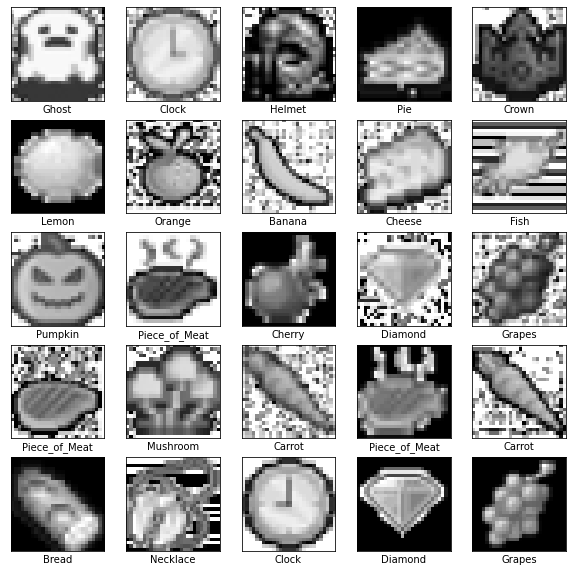

In [17]:
import os
import pickle
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt


def load_file(item_path):
    with open(item_path, 'rb') as f:
        item = pickle.load(f)
    return item


x_train = load_file('x_train.pickle') / 255
y_train = load_file('y_train.pickle')
x_test = load_file('x_test.pickle') / 255
y_test = load_file('y_test.pickle')
class_names = ['Banana', 'Book', 'Bread', 'Candy_Cane', 'Candy_Corn', 'Cannon', 
               'Carrot', 'Cheese', 'Cherry', 'Chest_Piece', 'Clock', 'Crown', 
               'Diamond', 'Egg', 'Empty_Bottle', 'Fire', 'Fish', 'Frog', 'Ghost', 
               'Grapes', 'Gun', 'Hat', 'Helmet', 'House', 'Key', 'Lemon', 'Mushroom',
               'Necklace', 'Orange', 'Pear', 'Pepper', 'Pie', 'Piece_of_Meat', 'Pineapple', 
               'Pretzel', 'Pumpkin', 'Rose', 'Strawberry', 'Watermelon']

plt.figure(figsize=(10, 10))
amount = 25
for i in range(amount):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    rc = np.random.randint(0, len(x_train)-1)
    plt.imshow(x_train[rc], cmap='gray')
    plt.xlabel(y_train[rc])

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [20]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(39, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.summary()

In [21]:
y_train = np.array([class_names.index(i) for i in y_train])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 2ms/step - loss: 3.7245 - accuracy: 0.0358
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 3.5628 - accuracy: 0.0680
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 3.4183 - accuracy: 0.1230
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 3.3073 - accuracy: 0.1855
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 3.1840 - accuracy: 0.2534
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 3.0888 - accuracy: 0.3223
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 2.9511 - accuracy: 0.4261
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 2.8340 - accuracy: 0.4766
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 2.7359 - accuracy: 0.4968
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 2.6311 - accuracy: 0.5390
Epoch 11/

# 

In [22]:
y_test = np.array([class_names.index(i) for i in y_test])
test_loss, test_acc = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.8926


In [37]:
class_names[np.argmax(model.predict(x_train[:1]))]

'Banana'

In [38]:
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://547445fd-4efc-4a43-b930-610d00f2fef4/assets
